In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import zz_feature_map
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, log_loss
from sklearn.preprocessing import StandardScaler
# import svc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
n_features = 4
n_classes = 2
n_informative_features = 2
n_redundant = n_features - n_informative_features
n_clusters_per_class = 1
X, y = make_classification(n_samples=500,
                           n_classes = n_classes,
                           n_features=n_features,
                           n_informative=n_informative_features,
                           n_redundant=n_redundant,
                           n_clusters_per_class=n_clusters_per_class,
                           random_state=42, shuffle=True)
print(X.shape)
print(y.shape)



(500, 4)
(500,)


In [3]:
# Use standard scaler to normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

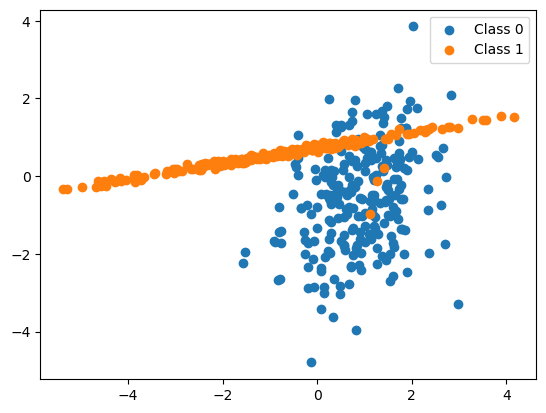

In [4]:
# Plot the data using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for c in np.unique(y):
    plt.scatter(X_pca[y==c, 0], X_pca[y==c, 1], label=f'Class {c}')
plt.legend()
plt.show()

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model

In [6]:
# Create model
model = SVC(kernel='linear', probability=True)
# Train model
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
# Print classification report
class_rep = classification_report(y_test, y_pred, output_dict=True)
# Print log loss
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(n_classes)]))

              precision    recall  f1-score   support

     Class 0       0.92      0.76      0.83        46
     Class 1       0.82      0.94      0.88        54

    accuracy                           0.86       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.87      0.86      0.86       100



In [7]:
model.n_support_

array([63, 62], dtype=int32)